In [1]:
import re
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
hashtag = 'palestine'

In [3]:
with open(f'../data/{hashtag}_edges.txt', 'r') as f:
    edges_raw = f.readlines()

In [4]:
edges_url = [edge.strip().split(',') for edge in edges_raw if 'None' not in edge.strip().split(',')]

In [5]:
expression = re.compile(r'@[\w\d\.]+')
edges = []
for edge in edges_raw:
    try:
        stitcher, stitchee = edge.strip().split(',')
        stitcher = re.findall(expression, stitcher)[0]
        stitchee = re.findall(expression, stitchee)[0]
        edges.append((stitcher, stitchee))
    except IndexError:
        continue

### Video network

In [6]:
G_video = ig.Graph().as_directed()
for s, t in edges_url:
    G_video.add_vertex(s)
    G_video.add_vertex(t)
    G_video.add_edge(s, t)

In [7]:
components = G_video.as_undirected().components()
sizes = [len(c) for c in components]
components_filtered = [c for c in components if len(c) > 2]
G_video_sub = G_video.subgraph(sum(components_filtered, []))

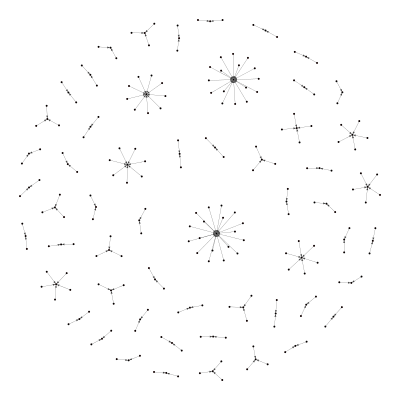

In [8]:
ig.plot(
    G_video_sub, 
    layout=G_video_sub.layout('fr'), 
    vertex_size=1, 
    edge_width=.2, 
    edge_arrow_size=0.2,
    bbox=(0, 0, 400, 400),
)

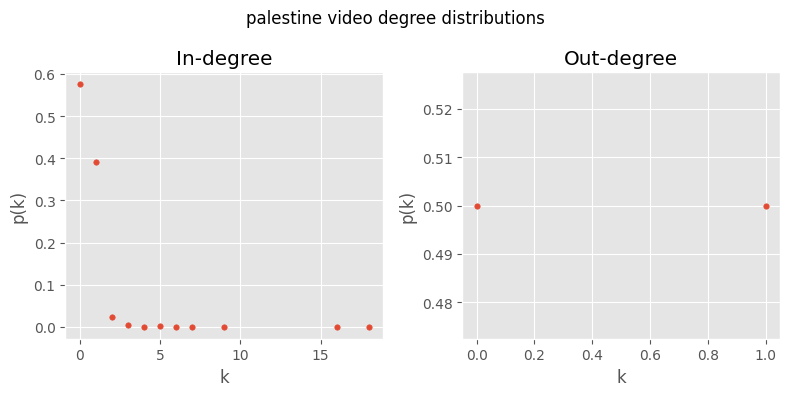

In [9]:
in_degrees = G_video.indegree()
out_degrees = G_video.outdegree()

# get frequency of each degree and normalize to density
d_in, v_in = np.unique(in_degrees, return_counts=True)
v_in = v_in / v_in.sum()
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()

dot_size = 15

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[8, 4])
fig.suptitle(f'{hashtag} video degree distributions')

# plot in-degree
ax1.scatter(d_in, v_in, s=dot_size)
ax1.set_xlabel('k')
ax1.set_ylabel('p(k)')
ax1.set_title('In-degree')

# plot out-degree
ax2.scatter(d_out, v_out, s=dot_size)
ax2.set_xlabel('k')
ax2.set_ylabel('p(k)')
ax2.set_title('Out-degree')

plt.tight_layout()

### User network

In [10]:
G_user = ig.Graph().as_directed()
for s, t in edges:
    G_user.add_vertex(s)
    G_user.add_vertex(t)
    G_user.add_edge(s, t)

In [11]:
components = G_user.as_undirected().components()
sizes = [len(c) for c in components]
components_filtered = [c for c in components if len(c) > 2]
G_user_sub = G_user.subgraph(sum(components_filtered, []))

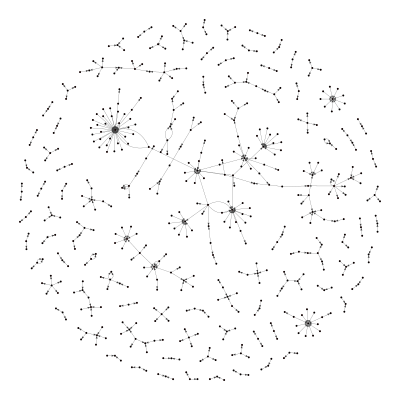

In [12]:
ig.plot(
    G_user_sub, 
    layout=G_user_sub.layout('fr'), 
    vertex_size=1, 
    edge_width=.2, 
    edge_arrow_size=0.2,
    bbox=(0, 0, 400, 400),
)

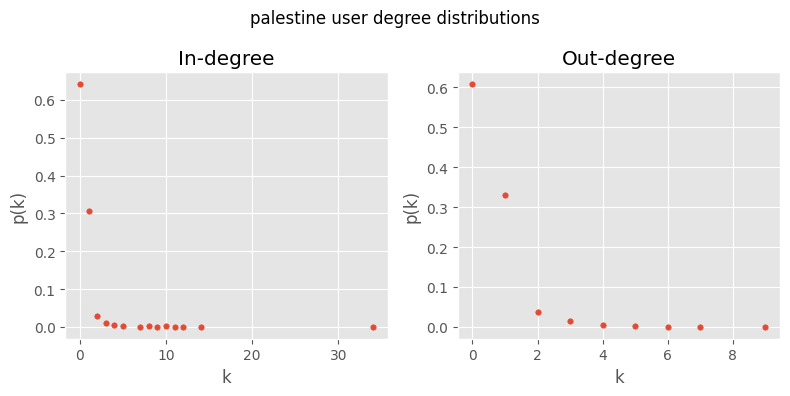

In [13]:
in_degrees = G_user.indegree()
out_degrees = G_user.outdegree()

# get frequency of each degree and normalize to density
d_in, v_in = np.unique(in_degrees, return_counts=True)
v_in = v_in / v_in.sum()
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()

dot_size = 15

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[8, 4])
fig.suptitle(f'{hashtag} user degree distributions')

# plot in-degree
ax1.scatter(d_in, v_in, s=dot_size)
ax1.set_xlabel('k')
ax1.set_ylabel('p(k)')
ax1.set_title('In-degree')

# plot out-degree
ax2.scatter(d_out, v_out, s=dot_size)
ax2.set_xlabel('k')
ax2.set_ylabel('p(k)')
ax2.set_title('Out-degree')

plt.tight_layout()